In [ ]:
# Twitter dataset available @ https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech

In [5]:
!unzip /content/sample_data/train.csv.zip

Archive:  /content/sample_data/train.csv.zip
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd

train_df = pd.read_csv('train.csv')

train_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [7]:
train_df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip

--2022-09-01 04:02:30--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.04MB/s    in 2m 40s  

2022-09-01 04:05:11 (5.14 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [9]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [10]:
import numpy as np

words = dict()

def add_to_dict(d, filename):
  with open(filename, 'r') as f:
    for line in f.readlines():
      line = line.split(' ')

      try:
        d[line[0]] = np.array(line[1:], dtype=float)
      except:
        continue

add_to_dict(words, 'glove.6B.50d.txt')
words

{'the': array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01]),
 ',': array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
        -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
        -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
        -0.41634 , -0.15428 ,  0.1

In [11]:
len(words)

400000

In [12]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:
tokenizer = nltk.RegexpTokenizer(r"\w+")

tokenizer.tokenize('@user when a father is dysfunctional and is')

['user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is']

In [15]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [16]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize('feet')

def message_to_token_list(s):
  tokens = tokenizer.tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t in words]

  return useful_tokens

message_to_token_list('@user feet a fathers is dysfunctional and is')

['user', 'foot', 'a', 'father', 'is', 'dysfunctional', 'and', 'is']

In [17]:
def message_to_word_vectors(message, word_dict=words):
  processed_list_of_tokens = message_to_token_list(message)

  vectors = []

  for token in processed_list_of_tokens:
    if token not in word_dict:
      continue
    
    token_vector = word_dict[token]
    vectors.append(token_vector)
  
  return np.array(vectors, dtype=float)

In [18]:
message_to_word_vectors('@user when a father is dysfunctional and is').shape

(8, 50)

In [19]:
train_df = train_df.sample(frac=1, random_state=1)
train_df.reset_index(drop=True, inplace=True)

split_index_1 = int(len(train_df) * 0.7)
split_index_2 = int(len(train_df) * 0.85)

train_df, val_df, test_df = train_df[:split_index_1], train_df[split_index_1:split_index_2], train_df[split_index_2:]

len(train_df), len(val_df), len(test_df)

(22373, 4794, 4795)

In [20]:
test_df

id  label                                              tweet
27167  21271      0                thats how we do it. #homebrewpeeps 
27168  26923      0  i havent ate no fast food/ home cooked food in...
27169   8332      0  i finally found a way how to delete old tweets...
27170  10079      0  because i'm happy clap along if you feel like ...
27171  24049      0  bye â repost from @user be  ! #kindness #hap...
...      ...    ...                                                ...
31957  17290      0  remember itð  #lost #empire #dreams #succes...
31958   5193      0             justice has been served #bosmatrial   
31959  12173      0  ive just repurposed this former mustard jar in...
31960    236      0  the happiest baby ive ever knownð #cute #sm...
31961  29734      0  #ased   bull up: you will dominate your bull a...

[4795 rows x 3 columns]

In [21]:
def df_to_X_y(dff):
  y = dff['label'].to_numpy().astype(int)

  all_word_vector_sequences = []

  for message in dff['tweet']:
    message_as_vector_seq = message_to_word_vectors(message)
    
    if message_as_vector_seq.shape[0] == 0:
      message_as_vector_seq = np.zeros(shape=(1, 50))

    all_word_vector_sequences.append(message_as_vector_seq)
  
  return all_word_vector_sequences, y

In [22]:
X_train, y_train = df_to_X_y(train_df)

print(len(X_train), len(X_train[0]))

22373 13


In [23]:
print(len(X_train), len(X_train[2]))

22373 7


(array([3.493e+03, 7.017e+03, 6.723e+03, 3.786e+03, 1.182e+03, 1.610e+02,
        7.000e+00, 0.000e+00, 1.000e+00, 3.000e+00]),
 array([ 1. ,  6.4, 11.8, 17.2, 22.6, 28. , 33.4, 38.8, 44.2, 49.6, 55. ]),
 <a list of 10 Patch objects>)

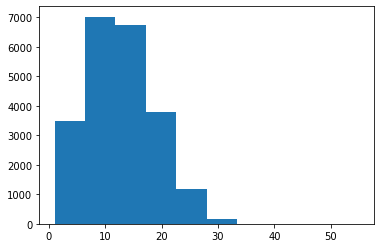

In [24]:
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

import matplotlib.pyplot as plt

plt.hist(sequence_lengths)

In [25]:
pd.Series(sequence_lengths).describe()

count    22373.000000
mean        12.692308
std          5.929912
min          1.000000
25%          8.000000
50%         12.000000
75%         17.000000
max         55.000000
dtype: float64

In [26]:
from copy import deepcopy

def pad_X(X, desired_sequence_length=57):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    sequence_length_difference = desired_sequence_length - x_seq_len
    
    pad = np.zeros(shape=(sequence_length_difference, 50))

    X_copy[i] = np.concatenate([x, pad])
  
  return np.array(X_copy).astype(float)

In [27]:
X_train = pad_X(X_train)

X_train.shape

(22373, 57, 50)

In [28]:
y_train.shape

(22373,)

In [29]:
X_val, y_val = df_to_X_y(val_df)
X_val = pad_X(X_val)

X_val.shape, y_val.shape

((4794, 57, 50), (4794,))

In [30]:
X_test, y_test = df_to_X_y(test_df)
X_test = pad_X(X_test)

X_test.shape, y_test.shape

((4795, 57, 50), (4795,))

In [31]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([])

model.add(layers.Input(shape=(57, 50)))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 57, 64)            29440     
                                                                 
 dropout (Dropout)           (None, 57, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 57, 64)            33024     
                                                                 
 dropout_1 (Dropout)         (None, 57, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 57, 64)            33024     
                                                                 
 dropout_2 (Dropout)         (None, 57, 64)            0         
                                                                 
 flatten (Flatten)           (None, 3648)              0

In [33]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint('model/', save_best_only=True)

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss=BinaryCrossentropy(), 
              metrics=['accuracy', AUC(name='auc')])

In [34]:
frequencies = pd.value_counts(train_df['label'])

frequencies

0    20820
1     1553
Name: label, dtype: int64

In [35]:
weights = {0: frequencies.sum() / frequencies[0], 1: frequencies.sum() / frequencies[1]}
weights

{0: 1.0745917387127761, 1: 14.406310367031551}

In [36]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp], class_weight=weights)

Epoch 1/20
700/700 [==============================] - ETA: 0s - loss: 0.9871 - accuracy: 0.7546 - auc: 0.8452

700/700 [==============================] - 37s 36ms/step - loss: 0.9871 - accuracy: 0.7546 - auc: 0.8452 - val_loss: 0.4082 - val_accuracy: 0.8275 - val_auc: 0.8967
Epoch 2/20
700/700 [==============================] - 11s 16ms/step - loss: 0.7981 - accuracy: 0.8224 - auc: 0.9007 - val_loss: 0.5095 - val_accuracy: 0.7576 - val_auc: 0.9036
Epoch 3/20
700/700 [==============================] - ETA: 0s - loss: 0.7616 - accuracy: 0.8285 - auc: 0.9098

700/700 [==============================] - 23s 33ms/step - loss: 0.7616 - accuracy: 0.8285 - auc: 0.9098 - val_loss: 0.3994 - val_accuracy: 0.8183 - val_auc: 0.9068
Epoch 4/20
699/700 [============================>.] - ETA: 0s - loss: 0.7381 - accuracy: 0.8332 - auc: 0.9154

700/700 [==============================] - 24s 34ms/step - loss: 0.7401 - accuracy: 0.8331 - auc: 0.9149 - val_loss: 0.2580 - val_accuracy: 0.8984 - val_auc: 0.9131
Epoch 5/20
700/700 [==============================] - 11s 15ms/step - loss: 0.7097 - accuracy: 0.8427 - auc: 0.9220 - val_loss: 0.3275 - val_accuracy: 0.8646 - val_auc: 0.9167
Epoch 6/20
700/700 [==============================] - 11s 16ms/step - loss: 0.6971 - accuracy: 0.8453 - auc: 0.9250 - val_loss: 0.3056 - val_accuracy: 0.8667 - val_auc: 0.9173
Epoch 7/20
700/700 [==============================] - 10s 15ms/step - loss: 0.6826 - accuracy: 0.8478 - auc: 0.9280 - val_loss: 0.3944 - val_accuracy: 0.8269 - val_auc: 0.9182
Epoch 8/20
700/700 [==============================] - 11s 15ms/step - loss: 0.6582 - accuracy: 0.8508 - auc: 0.9332 - val_loss: 0.2944 - val_accuracy: 0.8627 - val_auc: 0.9195
Epoch 9/20
700/700 [==============================] - 10s 15ms/step - loss: 0.6415 - accuracy: 0.8549 - auc: 0.9366 - val_loss: 0.3

700/700 [==============================] - 23s 33ms/step - loss: 0.5821 - accuracy: 0.8638 - auc: 0.9476 - val_loss: 0.2259 - val_accuracy: 0.9040 - val_auc: 0.9237
Epoch 14/20
700/700 [==============================] - 11s 16ms/step - loss: 0.5770 - accuracy: 0.8586 - auc: 0.9480 - val_loss: 0.3855 - val_accuracy: 0.8112 - val_auc: 0.9231
Epoch 15/20
700/700 [==============================] - 10s 15ms/step - loss: 0.5575 - accuracy: 0.8632 - auc: 0.9517 - val_loss: 0.2453 - val_accuracy: 0.8863 - val_auc: 0.9239
Epoch 16/20
700/700 [==============================] - 12s 17ms/step - loss: 0.5448 - accuracy: 0.8631 - auc: 0.9532 - val_loss: 0.2605 - val_accuracy: 0.8832 - val_auc: 0.9226
Epoch 17/20
700/700 [==============================] - 11s 16ms/step - loss: 0.5370 - accuracy: 0.8660 - auc: 0.9548 - val_loss: 0.2935 - val_accuracy: 0.8663 - val_auc: 0.9254
Epoch 18/20
700/700 [==============================] - 11s 16ms/step - loss: 0.5201 - accuracy: 0.8677 - auc: 0.9573 - val_loss

In [37]:
from tensorflow.keras.models import load_model

best_model = load_model('model/')

In [ ]:
test_predictions = (best_model.predict(X_test) > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      4454
           1       0.26      0.80      0.39       341

    accuracy                           0.83      4795
   macro avg       0.62      0.81      0.65      4795
weighted avg       0.93      0.83      0.86      4795

